# **Project 2**, APS1070 Summer 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: June 14, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Omar Al-Hilawani
*   Student Number: 1008735978

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



##**Part 1: Getting started [1.5 Marks]**

We are going to work with a forest cover dataset. This dataset contains tree observations from the Roosevelt National Forest in Colorado. All observations are cartographic variables from 30 meter x 30 meter sections of forest. This dataset contains 10 key features, including information on shadow coverage, distance to nearby landmarks, local topography and others.


Load the dataset in CSV file using Pandas. The dataset is called `Forest_data.csv`. Print out the first few columns of the dataset.

* How many rows are there? 286048 **[0.1]**
* Which column contains the targets? Anomaly **[0.1]**
* What is the meaning of target values? The meaning of the target values is 1 meaning that the data is an anomoly while 0 means that the data is non-anomalous.  **[0.2]**

In [41]:
pip install wget

In [42]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/Forest_data.csv')

'Forest_data.csv'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Load the data
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# See how many rows are in the dataset
num_rows = data.shape[0]

Number_of_rows = {"Number of rows": num_rows}

print(Number_of_rows)


{'Number of rows': 286048}


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? The percentage of entries in the Anomaly column under the 0 entries is 99.039672 and for the 1 entries is 0.960328. **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? The data is considered unbalanced because all the entries belong to one class which is 0 non-anomaly. In order for a dataset to be balanced, the different classes must have a approximately equal number of entries. **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? Balance is very important for machine learning as the model needs balanced datasets to learn about all classes. When the dataset is unblanaced, then the model will become more biased towards wahtever the majortity class is. This in turn will lead the model to predict the majority class more frequently while ignoring the minority class. Additionally, the accuracy that you will obtain will be misleading. This class distribution might affect a KNN classifier as KNN classifiers make predicitions based on the majority class. If the dataset is inblanaced, then the nearest neighbors will more likely fit to the majority class. **[0.2]**


In [45]:
# Load the dataset from the CSV file
file_path = 'Forest_data.csv'
df = pd.read_csv(file_path)

# Count the number of occurrences of each class
class_counts = df['Anomaly'].value_counts()

# Calculate percentages
class_percentages = (class_counts / len(df)) * 100

# Print the results
print("Percentage of entries for each class:")
print(class_percentages)
df.head()

Percentage of entries for each class:
Anomaly
0    99.039672
1     0.960328
Name: count, dtype: float64


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [46]:
### Split the data  ###

target_data = df['Anomaly']
feature_data = df.drop(columns=['Anomaly'])

# Split the data into training and combined validation/test set
X_train, X_temp, y_train, y_temp = train_test_split(feature_data, target_data, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# See the size of the training, validation, and test sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")



Training set size: 200233
Validation set size: 42907
Test set size: 42908


Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points


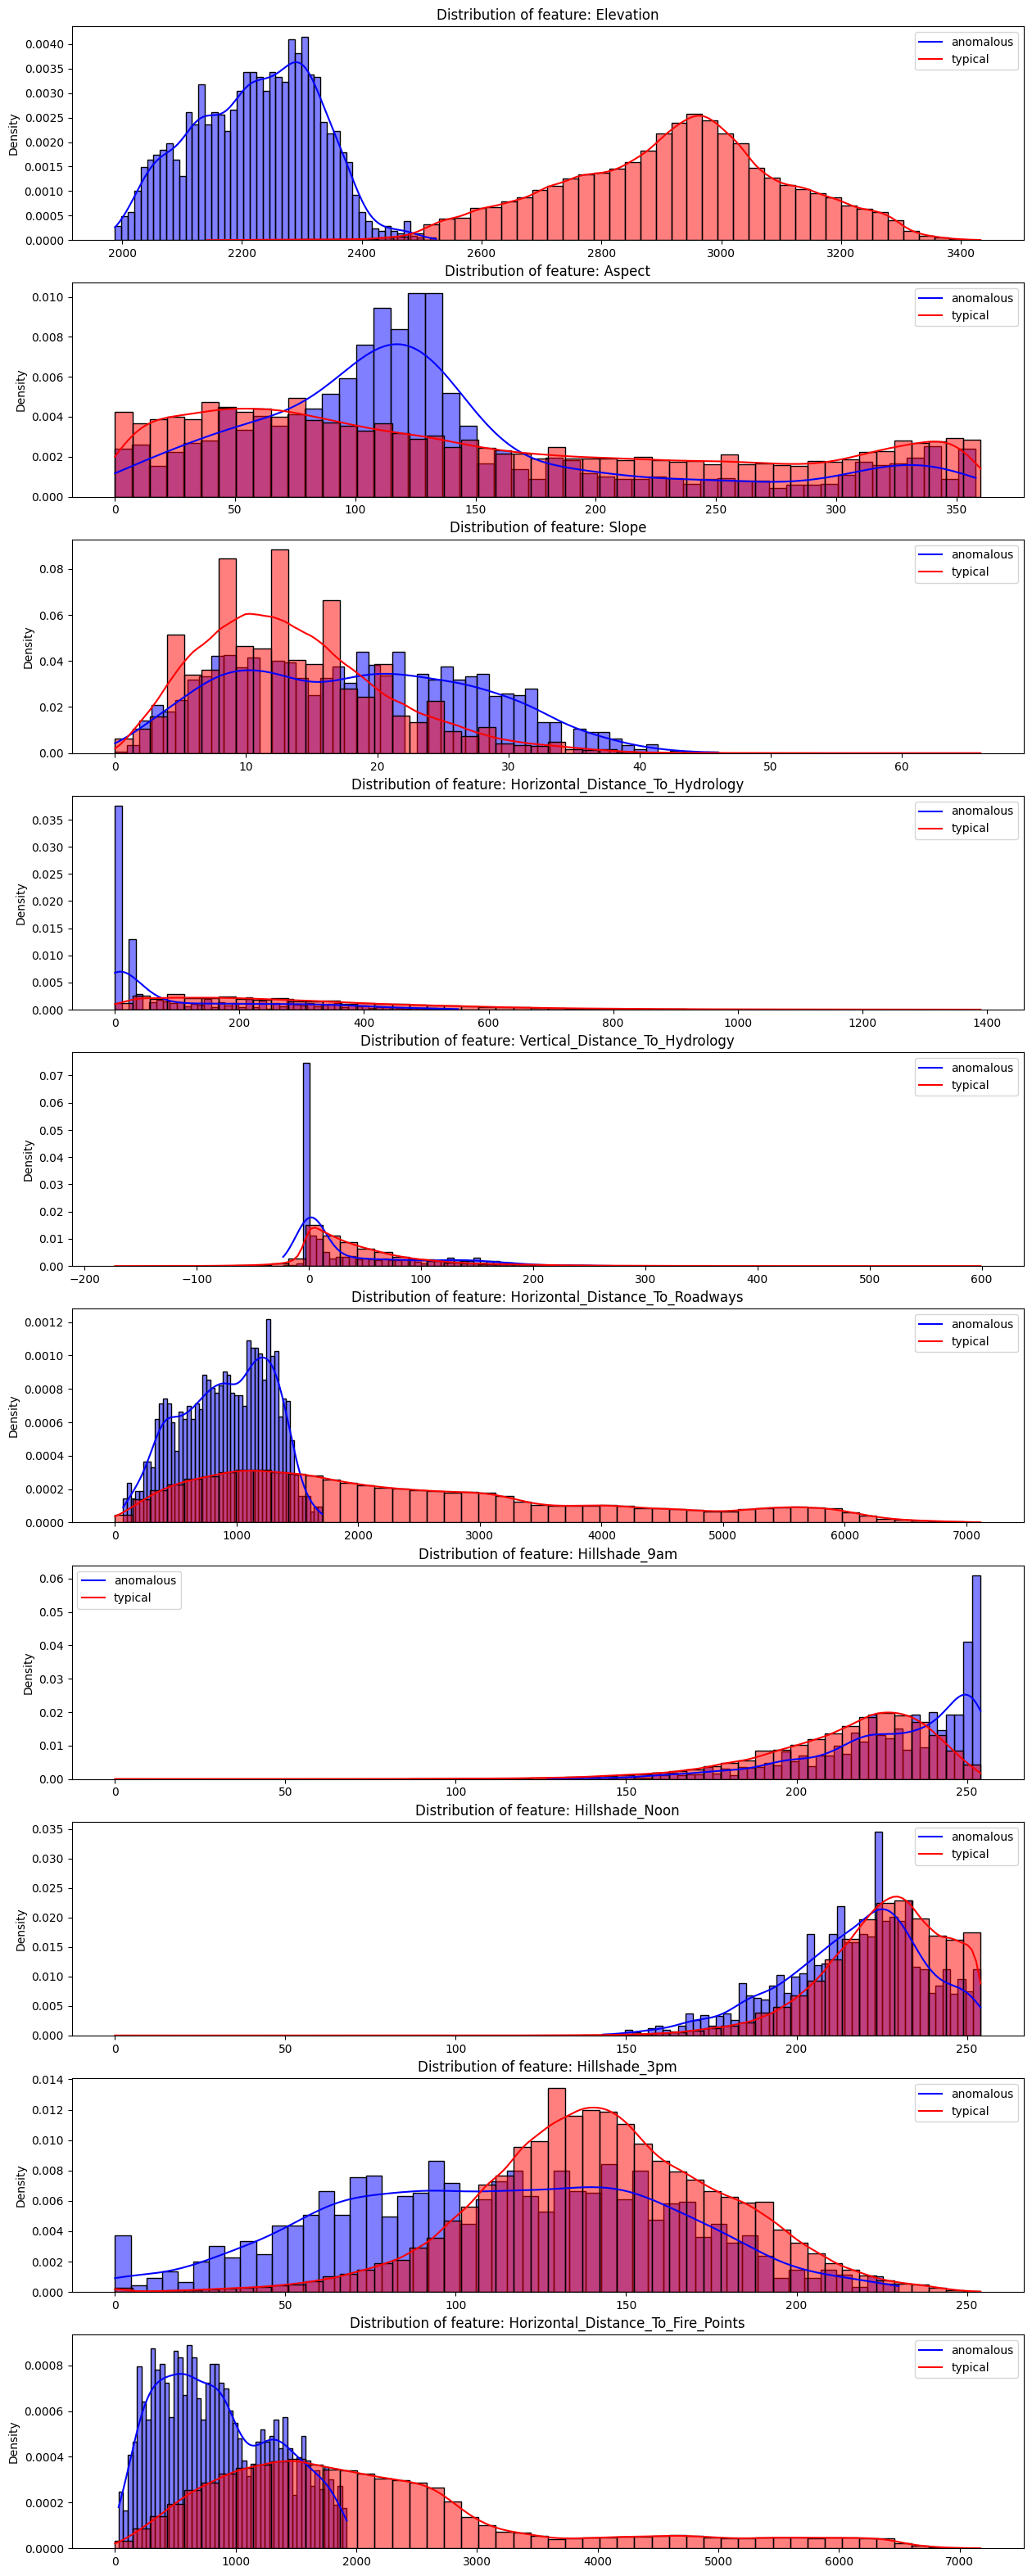

In [47]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'typical'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

These graphs shown above provide anaomaly detection using Gaussian models by seeing how different characteristics are scattered for typical and anomaious data. For example, if we are to assume guassian distribution for the provided data, when we plot it, we get to assess how well each feature aligns with our assumption. Another helpful thing is identifying outliers. Histograms tell us the tail behaviour of any of the given features. This will let us know if there are any outliers when compared to other data points. Another meaningful information we can obtain are empirical thresholds. When looking at the histogram of each feature, we can mention empirical thresholds that possibly classify irregularities when compared to the expected distribution. Another helpful thing is that these historgrams show us how well the data fits a Gaussian distribution assumption. This is important to see how effective a Gaussian anaomaly detection method is. Another thing is that historgrams help us in understanding how these clusters are seperated based on each feature distribution. Therefore, the 10 histograms shown are critical in visually examining and assessing how each individual feature is distributed.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that forests as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-anomalous forests** (instead of all the forests).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [48]:
# Part 2a. Fitting regardless of class

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score

# Store AUC scores
auc_scores = []

# Fit Gaussian Mixture and calculate AUC
for feature in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)
    gm.fit(X_train[[feature]])
    p = gm.score_samples(X_train[[feature]])
    z = gm.score_samples(X_val[[feature]])

    train_auc = roc_auc_score(y_train, -1*p)
    val_auc = roc_auc_score(y_val, -1*z)

    auc_scores.append((feature, train_auc, val_auc))

# Convert to DataFrame
auc_df = pd.DataFrame(auc_scores, columns=['Feature', 'Train AUC', 'Validation AUC'])
auc_df = auc_df.sort_values(by='Validation AUC', ascending=False)
print('AUC Table',auc_df)

# Get the best 3 features based on validation AUC
best_features = auc_df.head(3)['Feature'].values

print('Best_features:',best_features)

# Refit Gaussian Mixture, find optimal thresholds, and calculate F1 scores for each of the best features
optimal_thresholds = {}
f1_scores = {}

for feature in best_features:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[[feature]])
    val_scores = gm.score_samples(X_val[[feature]])
    thresholds = np.unique(val_scores)

    best_f1_value = 0
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (val_scores <= threshold)
        f1_result = f1_score(y_val, y_pred)

        if f1_result > best_f1_value:
            best_f1_value = f1_result
            best_threshold = threshold

    optimal_thresholds[feature] = best_threshold
    f1_scores[feature] = best_f1_value

    precision = precision_score(y_val, (val_scores <= best_threshold))
    recall = recall_score(y_val, (val_scores <= best_threshold))

    print(f"Feature: {feature}, Best Threshold: {best_threshold}, Best F1: {best_f1_value}, Precision: {precision}, Recall: {recall}")


AUC Table                               Feature  Train AUC  Validation AUC
0                           Elevation   0.999357        0.999345
9  Horizontal_Distance_To_Fire_Points   0.672193        0.681883
8                       Hillshade_3pm   0.658451        0.660931
3    Horizontal_Distance_To_Hydrology   0.659053        0.659604
2                               Slope   0.644247        0.648826
4      Vertical_Distance_To_Hydrology   0.650172        0.642457
6                       Hillshade_9am   0.630971        0.629436
5     Horizontal_Distance_To_Roadways   0.614681        0.608750
7                      Hillshade_Noon   0.535736        0.559227
1                              Aspect   0.378543        0.386010
Best_features: ['Elevation' 'Horizontal_Distance_To_Fire_Points' 'Hillshade_3pm']
Feature: Elevation, Best Threshold: -9.867862492516828, Best F1: 0.8990825688073394, Precision: 0.8376068376068376, Recall: 0.9702970297029703
Feature: Horizontal_Distance_To_Fire_Points, Best 

In [49]:
# Part 2b. Fitting based on class

# Store AUC scores
auc_scores = []

# Fit Gaussian Mixture and calculate AUC
for feature in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)
    gm.fit(X_train[y_train == 0][[feature]])
    p = gm.score_samples(X_train[[feature]])
    z = gm.score_samples(X_val[[feature]])

    train_auc = roc_auc_score(y_train, -1*p)
    val_auc = roc_auc_score(y_val, -1*z)

    auc_scores.append((feature, train_auc, val_auc))

# Convert to DataFrame
auc_df_1 = pd.DataFrame(auc_scores, columns=['Feature', 'Train AUC', 'Validation AUC'])
auc_df_1 = auc_df.sort_values(by='Validation AUC', ascending=False)
print('AUC Table',auc_df_1)

# Get the best 3 features based on validation AUC
best_features = auc_df.head(3)['Feature'].values

print('Best_features:',best_features)

# Refit Gaussian Mixture, find optimal thresholds, and calculate F1 scores for each of the best features
optimal_thresholds = {}
f1_scores_1 = {}

for feature in best_features:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[y_train == 0][[feature]])
    val_scores = gm.score_samples(X_val[[feature]])
    thresholds = np.unique(val_scores)

    best_f1_value = 0
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (val_scores <= threshold)
        f1_result = f1_score(y_val, y_pred)

        if f1_result > best_f1_value:
            best_f1_value = f1_result
            best_threshold = threshold

    optimal_thresholds[feature] = best_threshold
    f1_scores_1[feature] = best_f1_value

    precision = precision_score(y_val, (val_scores <= best_threshold))
    recall = recall_score(y_val, (val_scores <= best_threshold))

    print(f"Feature: {feature}, Best Threshold: {best_threshold}, Best F1: {best_f1_value}, Precision: {precision}, Recall: {recall}")


AUC Table                               Feature  Train AUC  Validation AUC
0                           Elevation   0.999357        0.999345
9  Horizontal_Distance_To_Fire_Points   0.672193        0.681883
8                       Hillshade_3pm   0.658451        0.660931
3    Horizontal_Distance_To_Hydrology   0.659053        0.659604
2                               Slope   0.644247        0.648826
4      Vertical_Distance_To_Hydrology   0.650172        0.642457
6                       Hillshade_9am   0.630971        0.629436
5     Horizontal_Distance_To_Roadways   0.614681        0.608750
7                      Hillshade_Noon   0.535736        0.559227
1                              Aspect   0.378543        0.386010
Best_features: ['Elevation' 'Horizontal_Distance_To_Fire_Points' 'Hillshade_3pm']
Feature: Elevation, Best Threshold: -10.37597706527573, Best F1: 0.8990825688073394, Precision: 0.8376068376068376, Recall: 0.9702970297029703
Feature: Horizontal_Distance_To_Fire_Points, Best 

In [50]:
comparison_df = pd.DataFrame({'Feature': best_features,'AUC Part 2a': auc_df[auc_df['Feature'].isin(best_features)]['Validation AUC'].values, 'AUC Part 2b': auc_df_1[auc_df_1['Feature'].isin(best_features)]['Validation AUC'].values, 'F1 Score Part 2a': [f1_scores[feature] for feature in best_features], 'F1 Score Part 2b': [f1_scores_1[feature] for feature in best_features]})

print("\nComparison of Results:")
print(comparison_df)


Comparison of Results:
                              Feature  AUC Part 2a  AUC Part 2b  \
0                           Elevation     0.999345     0.999345   
1  Horizontal_Distance_To_Fire_Points     0.681883     0.681883   
2                       Hillshade_3pm     0.660931     0.660931   

   F1 Score Part 2a  F1 Score Part 2b  
0          0.899083          0.899083  
1          0.035362          0.035520  
2          0.102004          0.103800  


**Report the complexity of your method (Big O notation) for determining the optimal threshold**

The Big O notation for determining the optimal threshold is O(n^2).

**Are these results different or similar?**

The results for 2a and 2b are quite similar with small differences in the F1 scores. The AUC scores for both 2a and 2b for features Elevation, Horizontal_Distance_To_Fire_Points, and Hillshade_3pm are the same. The F1 score for Elevation is the same in 2a and 2b. However, the F1 score for Horizontal_Distance_To_Fire_Points and Hillshade_3pm are slightly better in 2b when compared to 2a.

**Why?**

The AUC and F1 scores for Elevation were the same which indicates this feature being a strong predictor of the class. The AUC and F1 scores being slighlty different in Horizontal_Distance_To_Fire_Points and Hillshade_3pm might be because of threshold optimization step. Moreover, having similar results for all 3 features in 2a and 2b indicates fitting the gaussian mixture model using non-anomalous or anomalous and non-anomalous forests will not drastically improve your results which could be because of the features of the dataset and the data within this dataset.

## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the PR-AUC (Area under the Precision Recall Curve) instead of the ROC-AUC (Area under the ROC curve). **[0.5]**

Are these results similar or different from the previous results (using the ROC-AUC)? Why? Comment on why using the PR-AUC might be helpful here. **[0.5]**

In [51]:
# Part 2a. Fitting regardless of class using PR-AUC
from sklearn.metrics import average_precision_score

# Store AUC scores
auc_scores = []

# Fit Gaussian Mixture and calculate AUC
for feature in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)
    gm.fit(X_train[[feature]])
    p = gm.score_samples(X_train[[feature]])
    z = gm.score_samples(X_val[[feature]])

    train_auc = average_precision_score(y_train, -1*p)
    val_auc = average_precision_score(y_val, -1*z)

    auc_scores.append((feature, train_auc, val_auc))

# Convert to DataFrame for easier analysis
auc_df = pd.DataFrame(auc_scores, columns=['Feature', 'Train AUC', 'Validation AUC'])
auc_df = auc_df.sort_values(by='Validation AUC', ascending=False)
print('AUC Table',auc_df)
# Get the best 3 features based on validation AUC
best_features = auc_df.head(3)['Feature'].values

print('Best_features:',best_features)

# Refit Gaussian Mixture, find optimal thresholds, and calculate F1 scores for each of the best features
optimal_thresholds = {}
f1_scores = {}

for feature in best_features:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[[feature]])
    val_scores = gm.score_samples(X_val[[feature]])
    thresholds = np.unique(val_scores)

    best_f1_value = 0
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (val_scores <= threshold)
        f1_result = f1_score(y_val, y_pred)

        if f1_result > best_f1_value:
            best_f1_value = f1_result
            best_threshold = threshold

    optimal_thresholds[feature] = best_threshold
    f1_scores[feature] = best_f1_value

    precision = precision_score(y_val, (val_scores <= best_threshold))
    recall = recall_score(y_val, (val_scores <= best_threshold))

    print(f"Feature: {feature}, Best Threshold: {best_threshold}, Best F1: {best_f1_value}, Precision: {precision}, Recall: {recall}")


AUC Table                               Feature  Train AUC  Validation AUC
0                           Elevation   0.929346        0.930836
8                       Hillshade_3pm   0.032320        0.035774
2                               Slope   0.022407        0.023149
3    Horizontal_Distance_To_Hydrology   0.021764        0.021342
6                       Hillshade_9am   0.015992        0.015823
4      Vertical_Distance_To_Hydrology   0.015988        0.015687
9  Horizontal_Distance_To_Fire_Points   0.014082        0.014165
7                      Hillshade_Noon   0.013312        0.014140
5     Horizontal_Distance_To_Roadways   0.011206        0.010783
1                              Aspect   0.007278        0.007285
Best_features: ['Elevation' 'Hillshade_3pm' 'Slope']
Feature: Elevation, Best Threshold: -9.867862492516828, Best F1: 0.8990825688073394, Precision: 0.8376068376068376, Recall: 0.9702970297029703
Feature: Hillshade_3pm, Best Threshold: -7.673886172375238, Best F1: 0.10200364

In [52]:
# Part 2b. Fitting based on class using PR-AUC

# Store AUC scores
auc_scores = []

# Fit Gaussian Mixture and calculate AUC
for feature in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)
    gm.fit(X_train[y_train == 0][[feature]])
    p = gm.score_samples(X_train[[feature]])
    z = gm.score_samples(X_val[[feature]])

    train_auc = average_precision_score(y_train, -1*p)
    val_auc = average_precision_score(y_val, -1*z)

    auc_scores.append((feature, train_auc, val_auc))

# Convert to DataFrame for easier analysis
auc_df_1 = pd.DataFrame(auc_scores, columns=['Feature', 'Train AUC', 'Validation AUC'])
auc_df_1 = auc_df.sort_values(by='Validation AUC', ascending=False)
print('AUC Table',auc_df_1)
# Get the best 3 features based on validation AUC
best_features = auc_df.head(3)['Feature'].values

print('Best_features:',best_features)

# Refit Gaussian Mixture, find optimal thresholds, and calculate F1 scores for each of the best features
optimal_thresholds = {}
f1_scores_1 = {}

for feature in best_features:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[y_train == 0][[feature]])
    val_scores = gm.score_samples(X_val[[feature]])
    thresholds = np.unique(val_scores)

    best_f1_value = 0
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (val_scores <= threshold)
        f1_result = f1_score(y_val, y_pred)

        if f1_result > best_f1_value:
            best_f1_value = f1_result
            best_threshold = threshold

    optimal_thresholds[feature] = best_threshold
    f1_scores_1[feature] = best_f1_value

    precision = precision_score(y_val, (val_scores <= best_threshold))
    recall = recall_score(y_val, (val_scores <= best_threshold))

    print(f"Feature: {feature}, Best Threshold: {best_threshold}, Best F1: {best_f1_value}, Precision: {precision}, Recall: {recall}")


AUC Table                               Feature  Train AUC  Validation AUC
0                           Elevation   0.929346        0.930836
8                       Hillshade_3pm   0.032320        0.035774
2                               Slope   0.022407        0.023149
3    Horizontal_Distance_To_Hydrology   0.021764        0.021342
6                       Hillshade_9am   0.015992        0.015823
4      Vertical_Distance_To_Hydrology   0.015988        0.015687
9  Horizontal_Distance_To_Fire_Points   0.014082        0.014165
7                      Hillshade_Noon   0.013312        0.014140
5     Horizontal_Distance_To_Roadways   0.011206        0.010783
1                              Aspect   0.007278        0.007285
Best_features: ['Elevation' 'Hillshade_3pm' 'Slope']
Feature: Elevation, Best Threshold: -10.37597706527573, Best F1: 0.8990825688073394, Precision: 0.8376068376068376, Recall: 0.9702970297029703
Feature: Hillshade_3pm, Best Threshold: -7.736262976321237, Best F1: 0.10379981

In [53]:
# Comparing AUC and F1 scores for the three best 3 features using PR-AUC
comparison_df = pd.DataFrame({
    'Feature': best_features,
    'AUC Part 2a': auc_df[auc_df['Feature'].isin(best_features)]['Validation AUC'].values,
    'AUC Part 2b': auc_df_1[auc_df_1['Feature'].isin(best_features)]['Validation AUC'].values,
    'F1 Score Part 2a': [f1_scores[feature] for feature in best_features],
    'F1 Score Part 2b': [f1_scores_1[feature] for feature in best_features]
})

print("\nComparison of Results:")
print(comparison_df)


Comparison of Results:
         Feature  AUC Part 2a  AUC Part 2b  F1 Score Part 2a  F1 Score Part 2b
0      Elevation     0.930836     0.930836          0.899083          0.899083
1  Hillshade_3pm     0.035774     0.035774          0.102004          0.103800
2          Slope     0.023149     0.023149          0.074774          0.074774


**1. Are these results similar or different from the previous results (using the ROC-AUC)?**

The results when using ROC-AUC and PR-AUC show huge differences. The AUC and F1 scores using PR-AUC are all the same while the scores when using ROC-AUC are slightly different.

**2. Why**

The main reason as to why the results are different is because we are using two different metrics. ROC-AUC focuses on on the trade of between TPR and FPR at different thresholds. ROC-AUC is affected by how well the model separates the classes and more sensitive to the class being imbalanced. On the other hand, PR-AUC computes recall and precision and having similar results mean that the gaussian mixture model is not affected by using non-anomalous or anomalous and non-anomalous forests. Both are important when dealing with imbalanced datasets.

**3. Comment on why using the PR-AUC might be helpful here.**

Using PR-AUC is helpful for the following reasons:
i) When we have a dataset that contains imbalanced classes
ii) It considers both recall and precision at the same time. This is helpful as we get to see how well the model is balancing between capturing all positive cases in the dataset and making accurate positive predictions.
iii) Another reason PR-AUC might be helpful is because it directly aids in assessing the models efficiency and comparing it to our desired outcome. For example, detecting fraud is huge.
Therefore, using PR-AUC gives us a much better understanding of how the model performs wehn utilizing different thresholds.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (non-anomalous blue and anomalous red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid forests). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





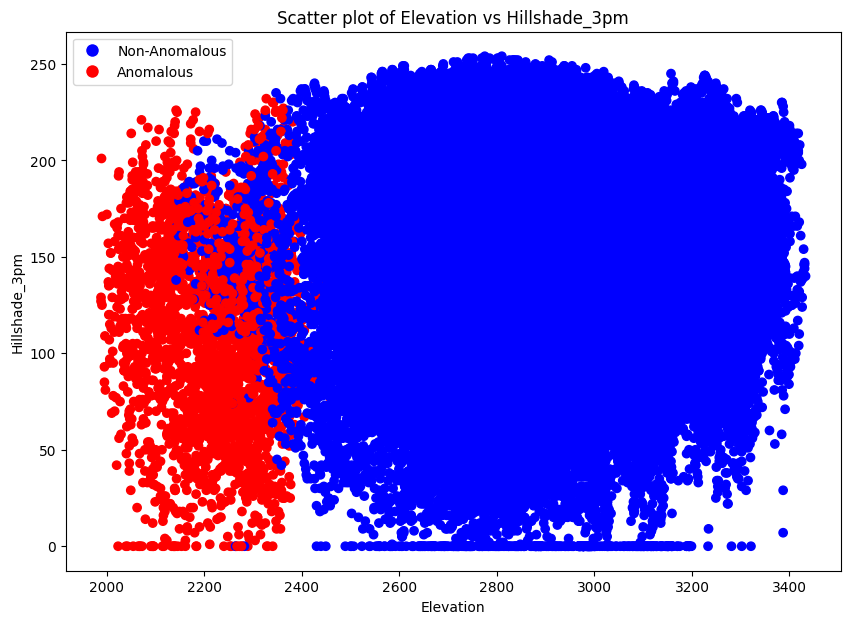

Training AUC: 0.9934056083017079
Validation AUC: 0.9932866707370452
Best Threshold: -16.16920174512486
Best F1 Score: 0.6323185011709602
Precision: 0.6
Recall: 0.6683168316831684


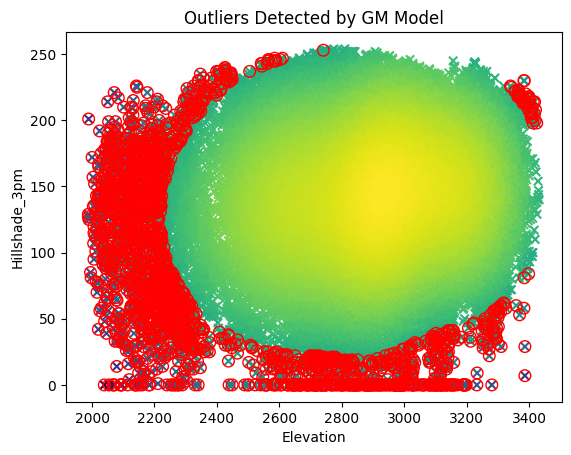

In [54]:
#First Pair
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# Select features and target
X = data[['Elevation', 'Hillshade_3pm']]
y = data['Anomaly']
f1 = 'Elevation'
f2 = 'Hillshade_3pm'

# Split the data into training and combined validation/test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# Fit Gaussian Mixture Model on training data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_train)

# Score samples from GMM on training and validation sets
h = gmm.score_samples(X_train)
g = gmm.score_samples(X_val)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, -1*h)  # Negative scores because GMM returns negative log-likelihoods
val_auc = roc_auc_score(y_val, -1*g)

# Define colors for plotting anomalies and non-anomalies
colors = {0: 'blue', 1: 'red'}

# Scatter plot of data points with class labels
plt.figure(figsize=(10, 7))
plt.scatter(X[f1], X[f2], c=y.map(colors), marker='o')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Scatter plot of Elevation vs Hillshade_3pm')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Anomalous'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomalous')])
plt.show()

print(f"Training AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")

# Find the optimal threshold to maximize F1 score on validation set
thresholds = np.linspace(min(g), max(g), num=100)
best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred = g <= threshold
    f1_1 = f1_score(y_val, y_pred)

    if f1_1 > best_f1:
        best_f1 = f1_1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

plt.scatter(X_train[f1], X_train[f2], c=h, cmap='viridis', marker='x')

# Correctly identify outliers based on the threshold
threshold = best_threshold
outliers = np.nonzero(h < threshold)[0]
plt.scatter(X_train.iloc[outliers][f1], X_train.iloc[outliers][f2], marker="o", facecolor="none", edgecolor="r", s=70)

# Additional plot settings
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Outliers Detected by GM Model')
plt.show()

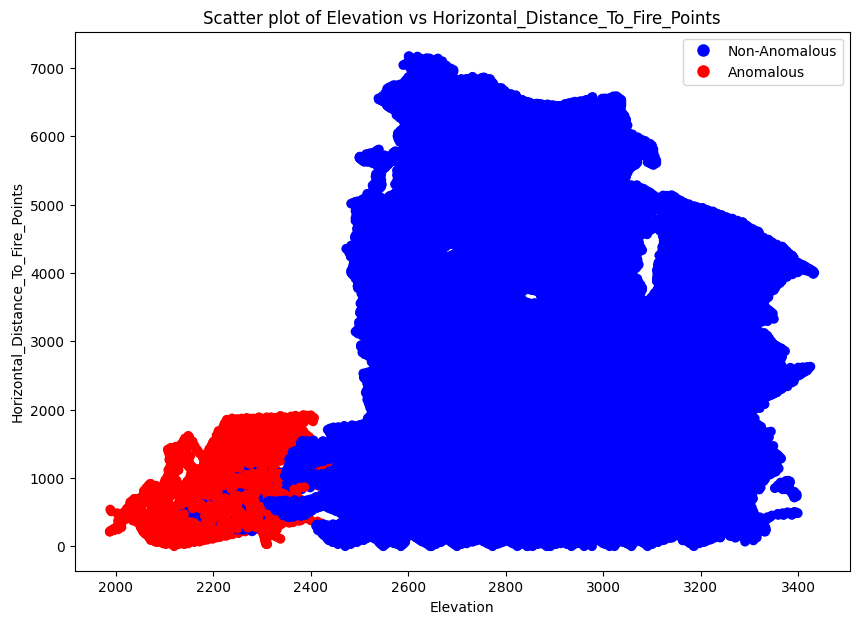

Training AUC: 0.9906770064951989
Validation AUC: 0.9913636847532952
Best Threshold: -19.047047521191324
Best F1 Score: 0.5353535353535354
Precision: 0.5463917525773195
Recall: 0.5247524752475248
Precision: 0.5463917525773195
Recall: 0.5247524752475248


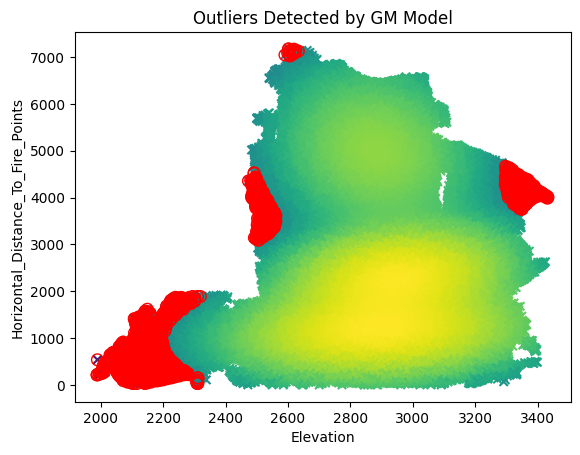

In [55]:
#Second Pair
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# Select features and target
X = data[['Elevation', 'Horizontal_Distance_To_Fire_Points']]
y = data['Anomaly']
f1 = 'Elevation'
f2 = 'Horizontal_Distance_To_Fire_Points'

# Split the data into training and combined validation/test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# Fit Gaussian Mixture Model on training data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_train)

# Score samples from GMM on training and validation sets
h = gmm.score_samples(X_train)
g = gmm.score_samples(X_val)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, -1*h)  # Negative scores because GMM returns negative log-likelihoods
val_auc = roc_auc_score(y_val, -1*g)

# Define colors for plotting anomalies and non-anomalies
colors = {0: 'blue', 1: 'red'}

# Scatter plot of data points with class labels
plt.figure(figsize=(10, 7))
plt.scatter(X[f1], X[f2], c=y.map(colors), marker='o')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Scatter plot of Elevation vs Horizontal_Distance_To_Fire_Points')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Anomalous'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomalous')])
plt.show()

print(f"Training AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")

# Find the optimal threshold to maximize F1 score on validation set
thresholds = np.linspace(min(g), max(g), num=100)
best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred = g <= threshold
    f1_1 = f1_score(y_val, y_pred)

    if f1_1 > best_f1:
        best_f1 = f1_1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Scatter plot for GMM scores with outliers marked
plt.scatter(X_train[f1], X_train[f2], c=h, cmap='viridis', marker='x')

# Correctly identify outliers based on the threshold
threshold = best_threshold
outliers = np.nonzero(h < threshold)[0]
plt.scatter(X_train.iloc[outliers][f1], X_train.iloc[outliers][f2], marker="o", facecolor="none", edgecolor="r", s=70)

# Additional plot settings
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Outliers Detected by GM Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


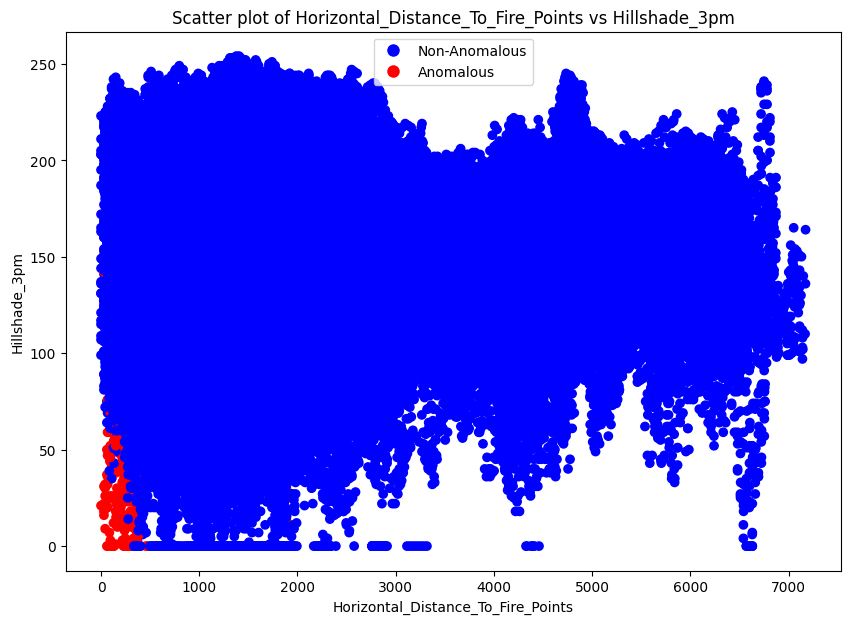

Training AUC: 0.6340052056552085
Validation AUC: 0.633831234510412
Best Threshold: -17.061634668489006
Best F1 Score: 0.0870748299319728
Precision: 0.09667673716012085
Recall: 0.07920792079207921
Precision: 0.09667673716012085
Recall: 0.07920792079207921


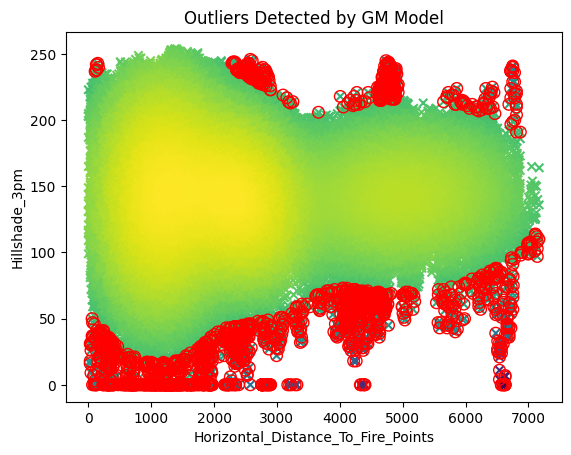

In [56]:
#Third Pair
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# Select features and target
X = data[['Horizontal_Distance_To_Fire_Points', 'Hillshade_3pm']]
y = data['Anomaly']
f1 = 'Horizontal_Distance_To_Fire_Points'
f2 = 'Hillshade_3pm'

# Split the data into training and combined validation/test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# Fit Gaussian Mixture Model on training data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_train)

# Score samples from GMM on training and validation sets
h = gmm.score_samples(X_train)
g = gmm.score_samples(X_val)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, -1*h)  # Negative scores because GMM returns negative log-likelihoods
val_auc = roc_auc_score(y_val, -1*g)

# Define colors for plotting anomalies and non-anomalies
colors = {0: 'blue', 1: 'red'}

# Scatter plot of data points with class labels
plt.figure(figsize=(10, 7))
plt.scatter(X[f1], X[f2], c=y.map(colors), marker='o')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Scatter plot of Horizontal_Distance_To_Fire_Points vs Hillshade_3pm')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Anomalous'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomalous')])
plt.show()

print(f"Training AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")

# Find the optimal threshold to maximize F1 score on validation set
thresholds = np.linspace(min(g), max(g), num=100)
best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred = g <= threshold
    f1_1 = f1_score(y_val, y_pred)

    if f1_1 > best_f1:
        best_f1 = f1_1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Scatter plot for GMM scores with outliers marked
plt.scatter(X_train[f1], X_train[f2], c=h, cmap='viridis', marker='x')

# Correctly identify outliers based on the threshold
threshold = best_threshold
outliers = np.nonzero(h < threshold)[0]
plt.scatter(X_train.iloc[outliers][f1], X_train.iloc[outliers][f2], marker="o", facecolor="none", edgecolor="r", s=70)

plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Outliers Detected by GM Model')
plt.show()

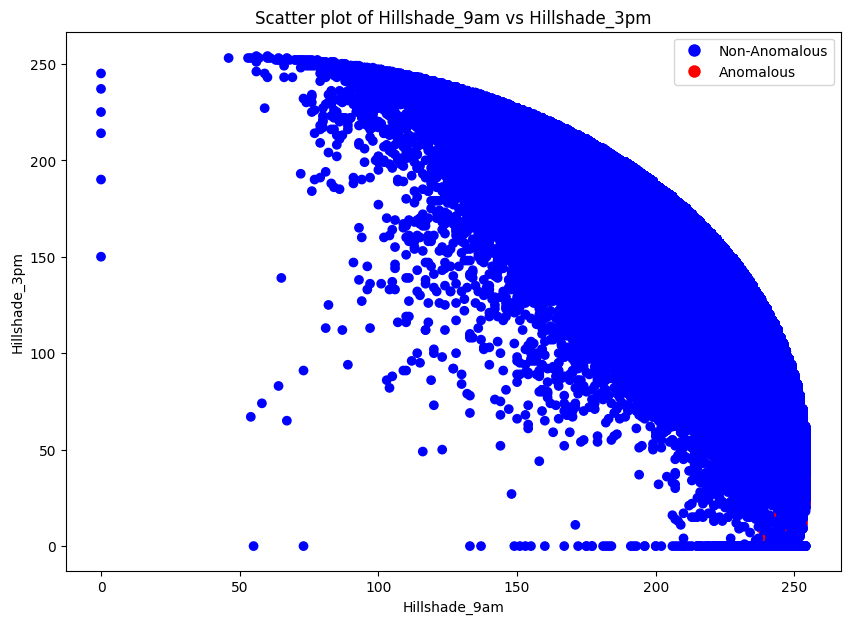

Training AUC: 0.6100154168685247
Validation AUC: 0.6232410676660447
Best Threshold: -10.727397705948249
Best F1 Score: 0.04855337545726638
Precision: 0.028044563964656165
Recall: 0.1806930693069307
Precision: 0.028044563964656165
Recall: 0.1806930693069307


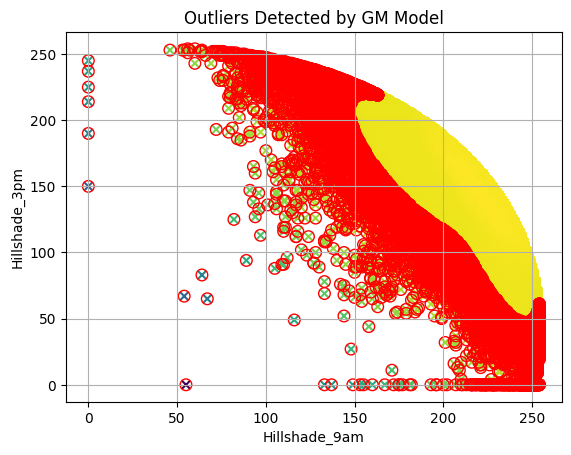

In [57]:
#Fourth Pair
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# Select features and target
X = data[['Hillshade_9am', 'Hillshade_3pm']]
y = data['Anomaly']
f1 = 'Hillshade_9am'
f2 = 'Hillshade_3pm'

# Split the data into training and combined validation/test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# Fit Gaussian Mixture Model on training data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_train)

# Score samples from GMM on training and validation sets
h = gmm.score_samples(X_train)
g = gmm.score_samples(X_val)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, -1*h)  # Negative scores because GMM returns negative log-likelihoods
val_auc = roc_auc_score(y_val, -1*g)

# Define colors for plotting anomalies and non-anomalies
colors = {0: 'blue', 1: 'red'}

# Scatter plot of data points with class labels
plt.figure(figsize=(10, 7))
plt.scatter(X[f1], X[f2], c=y.map(colors), marker='o')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Scatter plot of Hillshade_9am vs Hillshade_3pm')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Anomalous'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomalous')])
plt.show()

print(f"Training AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")

# Find the optimal threshold to maximize F1 score on validation set
thresholds = np.linspace(min(g), max(g), num=100)
best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred = g <= threshold
    f1_1 = f1_score(y_val, y_pred)

    if f1_1 > best_f1:
        best_f1 = f1_1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Evaluate precision and recall at the best threshold
precision = precision_score(y_val, g <= best_threshold)
recall = recall_score(y_val, g <= best_threshold)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Scatter plot for GMM scores with outliers marked
plt.scatter(X_train[f1], X_train[f2], c=h, cmap='viridis', marker='x')

# Correctly identify outliers based on the threshold
threshold = best_threshold
outliers = np.nonzero(h < threshold)[0]
plt.scatter(X_train.iloc[outliers][f1], X_train.iloc[outliers][f2], marker="o", facecolor="none", edgecolor="r", s=70)

# Additional plot settings
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Outliers Detected by GM Model')
plt.grid(True)
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for anomalous and non-anomalous forests.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the forest is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the forest is an anomaly (the forest belongs to the $G_2$ distribution which represents anomalous forests). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [58]:
# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Create a list to store results
results = []

# Iterate through each feature
for feature in features:
    X = data[[feature]]
    y = data['Anomaly']

    # Split data into train and validation sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

    # Separate the training data into non-anomalous and anomalous
    X_train_non_anomalous = X_train[y_train == 0]
    X_train_anomalous = X_train[y_train == 1]

    # Fit Gaussian distribution (G1) on non-anomalous forests
    gmm_non_anomalous = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gmm_non_anomalous.fit(X_train_non_anomalous)

    # Fit Gaussian distribution (G2) on anomalous forests
    gmm_anomalous = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gmm_anomalous.fit(X_train_anomalous)

    # Compute score samples (S1) for G1 on the validation set
    S1 = gmm_non_anomalous.score_samples(X_val)

    # Compute score samples (S2) for G2 on the validation set
    S2 = gmm_anomalous.score_samples(X_val)

    # Find the optimal c to maximize the F1 score on the validation set
    best_f1 = 0
    best_c = 0

    c_values = np.arange(0, 10.1, 0.1)
    for c in c_values:
        y_pred = S1 < c * S2
        f1 = f1_score(y_val, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_c = c

    # Store results in the list
    results.append({'Feature': feature, 'Best c': best_c, 'Best F1 Score': best_f1})

    # Print the results for the current feature
    print(f"Results for {feature}:")
    print(f"Best c: {best_c}")
    print(f"Best F1 Score: {best_f1}")

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Print the results table
print("\nResults Table:")
print(results_df)

# Find the feature with the best F1 score
best_feature_row = results_df.loc[results_df['Best F1 Score'].idxmax()]

print("\nBest Feature:")
print(best_feature_row)

Results for Elevation:
Best c: 1.6
Best F1 Score: 0.8958333333333334
Results for Aspect:
Best c: 1.0
Best F1 Score: 0.02155848489904889
Results for Slope:
Best c: 1.4000000000000001
Best F1 Score: 0.06917113893858079
Results for Horizontal_Distance_To_Hydrology:
Best c: 1.1
Best F1 Score: 0.042485636528575746
Results for Vertical_Distance_To_Hydrology:
Best c: 1.0
Best F1 Score: 0.024113542507238808
Results for Horizontal_Distance_To_Roadways:
Best c: 1.1
Best F1 Score: 0.05114942528735632
Results for Hillshade_9am:
Best c: 1.1
Best F1 Score: 0.05130460275579009
Results for Hillshade_Noon:
Best c: 1.2000000000000002
Best F1 Score: 0.040019056693663645
Results for Hillshade_3pm:
Best c: 1.3
Best F1 Score: 0.1204460966542751
Results for Horizontal_Distance_To_Fire_Points:
Best c: 1.2000000000000002
Best F1 Score: 0.04798940923382426

Results Table:
                              Feature  Best c  Best F1 Score
0                           Elevation     1.6       0.895833
1                  

**What is the best F1 Score that you get for training and validation? Which feature and what c?**

The best F1 Score that I got for training and validation is 0.895833. It was the Elevation feature with a C value of 1.6.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid forest, and multiple components for anomalous ones! Why does it make sense to have multiple components for anomalous forests?

In [59]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

# Split the data
X = data[features]
y = data['Anomaly']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier feature selection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=features, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

# Define different model configurations
model_configs = [{'features': ['Elevation'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 2},{'features': ['Elevation', 'Aspect'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 2},
    {'features': ['Elevation', 'Aspect', 'Slope'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 2},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 3},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 3},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 4},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 4},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 5},
    {'features': ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], 'n_components_non_anomalous': 1, 'n_components_anomalous': 5},
    {'features': features, 'n_components_non_anomalous': 1, 'n_components_anomalous': 6},
]

# List to store the results
results = []

# Iterate through each model configuration
for config in model_configs:
    selected_features = config['features']
    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]

    # Fit Gaussian distribution on non-anomalous forests
    gmm_non_anomalous = GaussianMixture(n_components=config['n_components_non_anomalous'], covariance_type='full', random_state=0)
    gmm_non_anomalous.fit(X_train_selected[y_train == 0])

    # Fit Gaussian distribution on anomalous forests
    gmm_anomalous = GaussianMixture(n_components=config['n_components_anomalous'], covariance_type='full', random_state=0)
    gmm_anomalous.fit(X_train_selected[y_train == 1])

    # Compute score samples for training and validation sets
    S1_train = gmm_non_anomalous.score_samples(X_train_selected)
    S2_train = gmm_anomalous.score_samples(X_train_selected)
    S1_val = gmm_non_anomalous.score_samples(X_val_selected)
    S2_val = gmm_anomalous.score_samples(X_val_selected)

    train_scores = S1_train - S2_train
    val_scores = S1_val - S2_val

    # Compute AUC scores
    train_auc = roc_auc_score(y_train, -train_scores)
    val_auc = roc_auc_score(y_val, -val_scores)

    # Find the optimal threshold to maximize F1 score on validation set
    thresholds = np.linspace(min(val_scores), max(val_scores), num=100)

    best_f1_val = 0
    best_threshold_val = 0

    for threshold in thresholds:
        y_pred_val = val_scores <= threshold
        f1_val = f1_score(y_val, y_pred_val)

        if f1_val > best_f1_val:
            best_f1_val = f1_val
            best_threshold_val = threshold

    y_pred_train = train_scores <= best_threshold_val
    best_f1_train = f1_score(y_train, y_pred_train)

    # Store results in the list
    results.append({'Features': selected_features,'n_components_non_anomalous': config['n_components_non_anomalous'],'n_components_anomalous': config['n_components_anomalous'],'Train AUC': train_auc,
        'Validation AUC': val_auc,
        'Best Train F1': best_f1_train,
        'Best Validation F1': best_f1_val,
        'Best Threshold Validation': best_threshold_val
    })

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Print the results table
print("\nResults Table:")
print(results_df)

# Find the model with the best F1 score on the validation set
best_model_row = results_df.loc[results_df['Best Validation F1'].idxmax()]

print("\nBest Model:")
print(best_model_row)

print("\nTotal Number of Components is 4", )




Results Table:
                                            Features  \
0                                        [Elevation]   
1                                [Elevation, Aspect]   
2                         [Elevation, Aspect, Slope]   
3  [Elevation, Aspect, Slope, Horizontal_Distance...   
4  [Elevation, Aspect, Slope, Horizontal_Distance...   
5  [Elevation, Aspect, Slope, Horizontal_Distance...   
6  [Elevation, Aspect, Slope, Horizontal_Distance...   
7  [Elevation, Aspect, Slope, Horizontal_Distance...   
8  [Elevation, Aspect, Slope, Horizontal_Distance...   
9  [Elevation, Aspect, Slope, Horizontal_Distance...   

   n_components_non_anomalous  n_components_anomalous  Train AUC  \
0                           1                       2   0.999384   
1                           1                       2   0.999440   
2                           1                       2   0.999582   
3                           1                       3   0.999793   
4                          

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


**Which model worked better?**

The model that worked better was the one that had the following features Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, with n_components_non_anomalous: 1 and n_components_anomalous: 3.

In [60]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Forest_data.csv'
data = pd.read_csv(file_path)

# Best model configuration
best_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']
n_components_non_anomalous = 1
n_components_anomalous = 3

# Split the data
X = data[best_features]
y = data['Anomaly']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Fit Gaussian distribution on non-anomalous forests
gmm_non_anomalous = GaussianMixture(n_components=n_components_non_anomalous, covariance_type='full', random_state=0)
gmm_non_anomalous.fit(X_train[y_train == 0])

# Fit Gaussian distribution on anomalous forests
gmm_anomalous = GaussianMixture(n_components=n_components_anomalous, covariance_type='full', random_state=0)
gmm_anomalous.fit(X_train[y_train == 1])

# Compute score samples for validation and test sets
S1_val = gmm_non_anomalous.score_samples(X_val)
S2_val = gmm_anomalous.score_samples(X_val)
S1_test = gmm_non_anomalous.score_samples(X_test)
S2_test = gmm_anomalous.score_samples(X_test)

# Find the optimal c to maximize the F1 score on the validation set
best_f1_val = 0
best_c_val = 0

c_values = np.arange(0, 10.1, 0.1)
for c in c_values:
    y_pred_val = S1_val < c * S2_val
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_c_val = c

# Apply the model to the test set using the optimal c
y_pred_test = S1_test < best_c_val * S2_test

# Calculate and report the F1 Score, Precision, and Recall on the test set
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


Test F1 Score: 0.9221411192214112
Test Precision: 0.9199029126213593
Test Recall: 0.9243902439024391


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


**Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better?**

The first distribution is Dirichlet Process Mixture Models (DPMMs)
DPMMs use a non-parametric Bayesian approach when clustering. This means that the number of clusters is not fixed in advance as it increases with the data. DPMMs are becoming more popular in machine learning and Bayesian statistics.
This distribution works best when the number of clusters is not known and it is expected to change as we get more data.
Reference:https://medium.com/cube-dev/bayesian-nonparametrics-9f2ce7074b97

The second distribution is Multivariate Student's t-Distribution. Using this distribution is useful for data that contains heavier tails when compared to Gaussian Distribution. This distribution is popular in robost and financial statistics. Also, this distribution is better suited in when the data has heavier tails or with contains outliers.
Reference: https://www.diva-portal.org/smash/get/diva2:618567/fulltext02.pdf

The third distribution is Vine Copulas. This distribution permits flexible modeling of dependencies via pair copulas in a hierarchical manner. The popularity is increasing when dealing with complex dependency modeling. This distribution is useful for high-dimensional data analysis to accurately capture complex dependencies across multiple variables.
Reference: https://tnagler.github.io/vine-arisa.pdf

**How can we find a suitable distribution to model our data?**

To find a suitable distribution to model our data, we would need to perform the following:
1. Visualize the data using histograms, box plots, etc to see how the data is distributed
2. Perform statistical tests to see how well our data fits on different distributions
3. Estimate the parameters
4. Understand what your data represents so you can use the right distribution for example exponential or poisson distribution
5. Perform cross-validation to see how each model reacts to never before seen data